# Using Recursive Bisection Search to Detect Characters in Strings

*January 30, 2016*

*An article about a mini-assignment from the edX course ["Introduction to Computer Science and Programming Using Python"](https://www.edx.org/course/introduction-computer-science-mitx-6-00-1x-6).*

<hr>

The problem is as follows:

>Given a character and a string of alphabetized characters, write a program that returns “True” if the character is present in the string and “False” if it is not.

The assignment gives you a few hints and specifications (naturally you cannot use Python’s 'in' statement).

My first attempt failed horribly. It started well, I could solve the test case (find 'a' in 'abc'), but I did not sufficiently understand what the program was doing. If something didn’t work, I’d quickly determine a possible cause and apply a patch. Eventually the code turned into spaghetti; it looked bad and could not handle the inputs it should for unknown reasons.

Still, I learned more about the problem and what I had to pay attention to. I realized that there were three base cases, not one. I also realized that I did not know how to slice strings.

Attempt #2 was more serious. I broke out pencil and paper and methodically solved two cases: find 'k' in 'hkqruv' and find 'u' in 'hkqruv'. Why these two? The first requires bisecting left, while the second requires bisecting right.

## The First Case

I have the string 'hkqruv' (aStr) and want to find 'k'. Since the string is alphabetized, bisection search is possible. We can take the length of the string (6) and divide it by 2 to get the index position of our first guess.

```python
aStrLength = len(aStr)
guessIndex = aStrLength // 2
guessChar = aStr[guessIndex]
```

We can test if this character equals the character we are searching for (k) and whether it is higher or lower in the alphabet than 'k'. Based on the result of our tests, the program will either return True or carry out a left or right bisection.

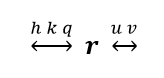

In the above graphic, we see our guess character in bold surrounded by two intervals/bisections. Since we are looking for 'k' and know that r > k, we should look in the left bisection.

```python
# search the left bisection
elif guessStringValue > char:
    section = aStr[0:guessIndexValue]
    return isIn(char, section)
```

And the above code does exactly that. If our guessCharacter is greater than the character we are searching for, we slice up the input string ('hkqruv') so that it matches the interval we want to search ('hkq') and then call the function again.

## The Second Case

The second case is very similar:

```python
# search the right bisection
elif guessStringValue < char:
    section = aStr[guessIndexValue+1:]
    return isIn(char, section)
```

The whole process repeats itself until reaching one of three base cases:

1. Input string is an empty string (return False)
2. Input string is length 1 (return False; no more bisections can be made)
3. Our guessCharacter matches the input character (return True)

In the future, I should ensure I understand how to solve the problem computationally prior to implementing it and to test incrementally. There were a few times where I moved forward on bad assumptions. For instance, I thought:

```python
inputString[guessIndexValue:]
```

Would output "bc", when it outputted "abc". What I actually wanted was:

```python
inputString[guessIndexValue+1:]
```

If I had taken a minute to think about it or confirm how slicing works, much frustration would have been averted.

## The Finished Product

In [3]:
def isIn(char, aStr):
    '''
    char: a single character
    aStr: an alphabetized string

    returns: True if char is in aStr; False otherwise
    '''
    aStrLength = len(aStr)

    # returns False when char not found or empty string is entered
    if aStr == "" or aStrLength == 0:
        return False

    else:
        guessIndexValue = aStrLength // 2
        guessStringValue = aStr[guessIndexValue]

        if guessStringValue == char:
            return True

        # search the left bisection
        elif guessStringValue > char:
            section = aStr[0:guessIndexValue]
            return isIn(char, section)

        # search the right bisection
        elif guessStringValue < char:
            section = aStr[guessIndexValue+1:]
            return isIn(char, section)

In [5]:
isIn("k", "hkqruv")

True

In [6]:
isIn("z", "hkqruv")

False